# Telecom-churn-dataset-ibm-watson-analytics

Analysis of IBM Watson Analytic customer telecommunications data to determine why customers are churning and develop and test some models to identify and predict at-risk customers.


In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn import tree
from sklearn import ensemble 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score 
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

# Data Exploration & Visualization

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx')
df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Check for null values
display(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [152]:
# Convert TotalCharges to numeric
df['TotalCharges'] = df.TotalCharges.convert_objects(convert_numeric=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [177]:
display(df.isnull().any())

is_male                      False
SeniorCitizen                False
Partner                      False
Dependents                   False
tenure                       False
PhoneService                 False
MultipleLines                False
OnlineSecurity               False
OnlineBackup                 False
DeviceProtection             False
TechSupport                  False
StreamingTV                  False
StreamingMovies              False
PaperlessBilling             False
MonthlyCharges               False
TotalCharges                  True
Churn                        False
DSL                          False
Fiber optic                  False
NoInt_service                False
Month-to-month               False
One year                     False
Two year                     False
Bank transfer (automatic)    False
Credit card (automatic)      False
Electronic check             False
Mailed check                 False
dtype: bool

In [191]:
df['TotalCharges'].loc[df['TotalCharges'].isnull()] = 0
display(df['TotalCharges'].isnull().any())

False

In [5]:
numeric = df.select_dtypes(['int64','float64']).columns
categoric =  df.select_dtypes(['object']).columns

### Graphs of the Numeric Variables:

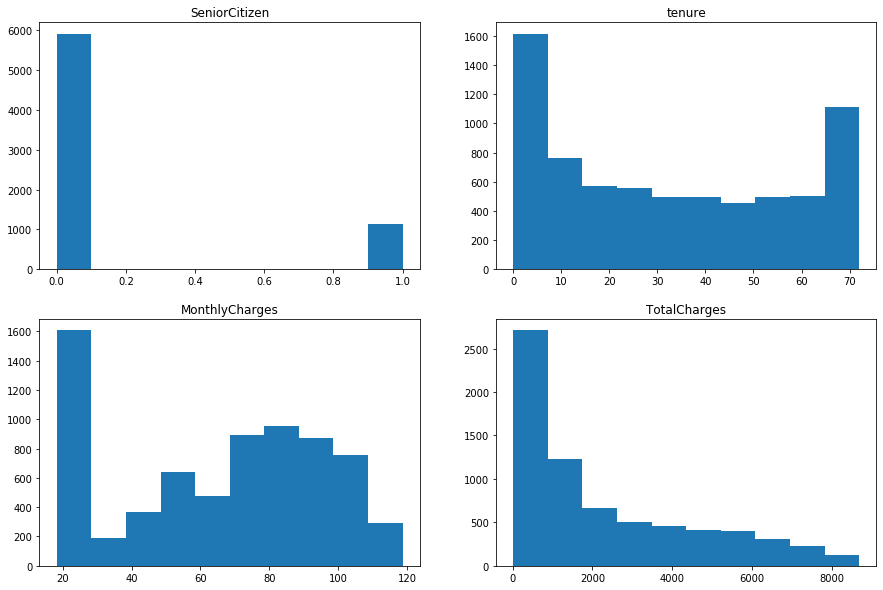

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col])
    plt.title(col)

### Graphs of the Categorical Variables:

In [6]:
categoric = categoric.drop('customerID')

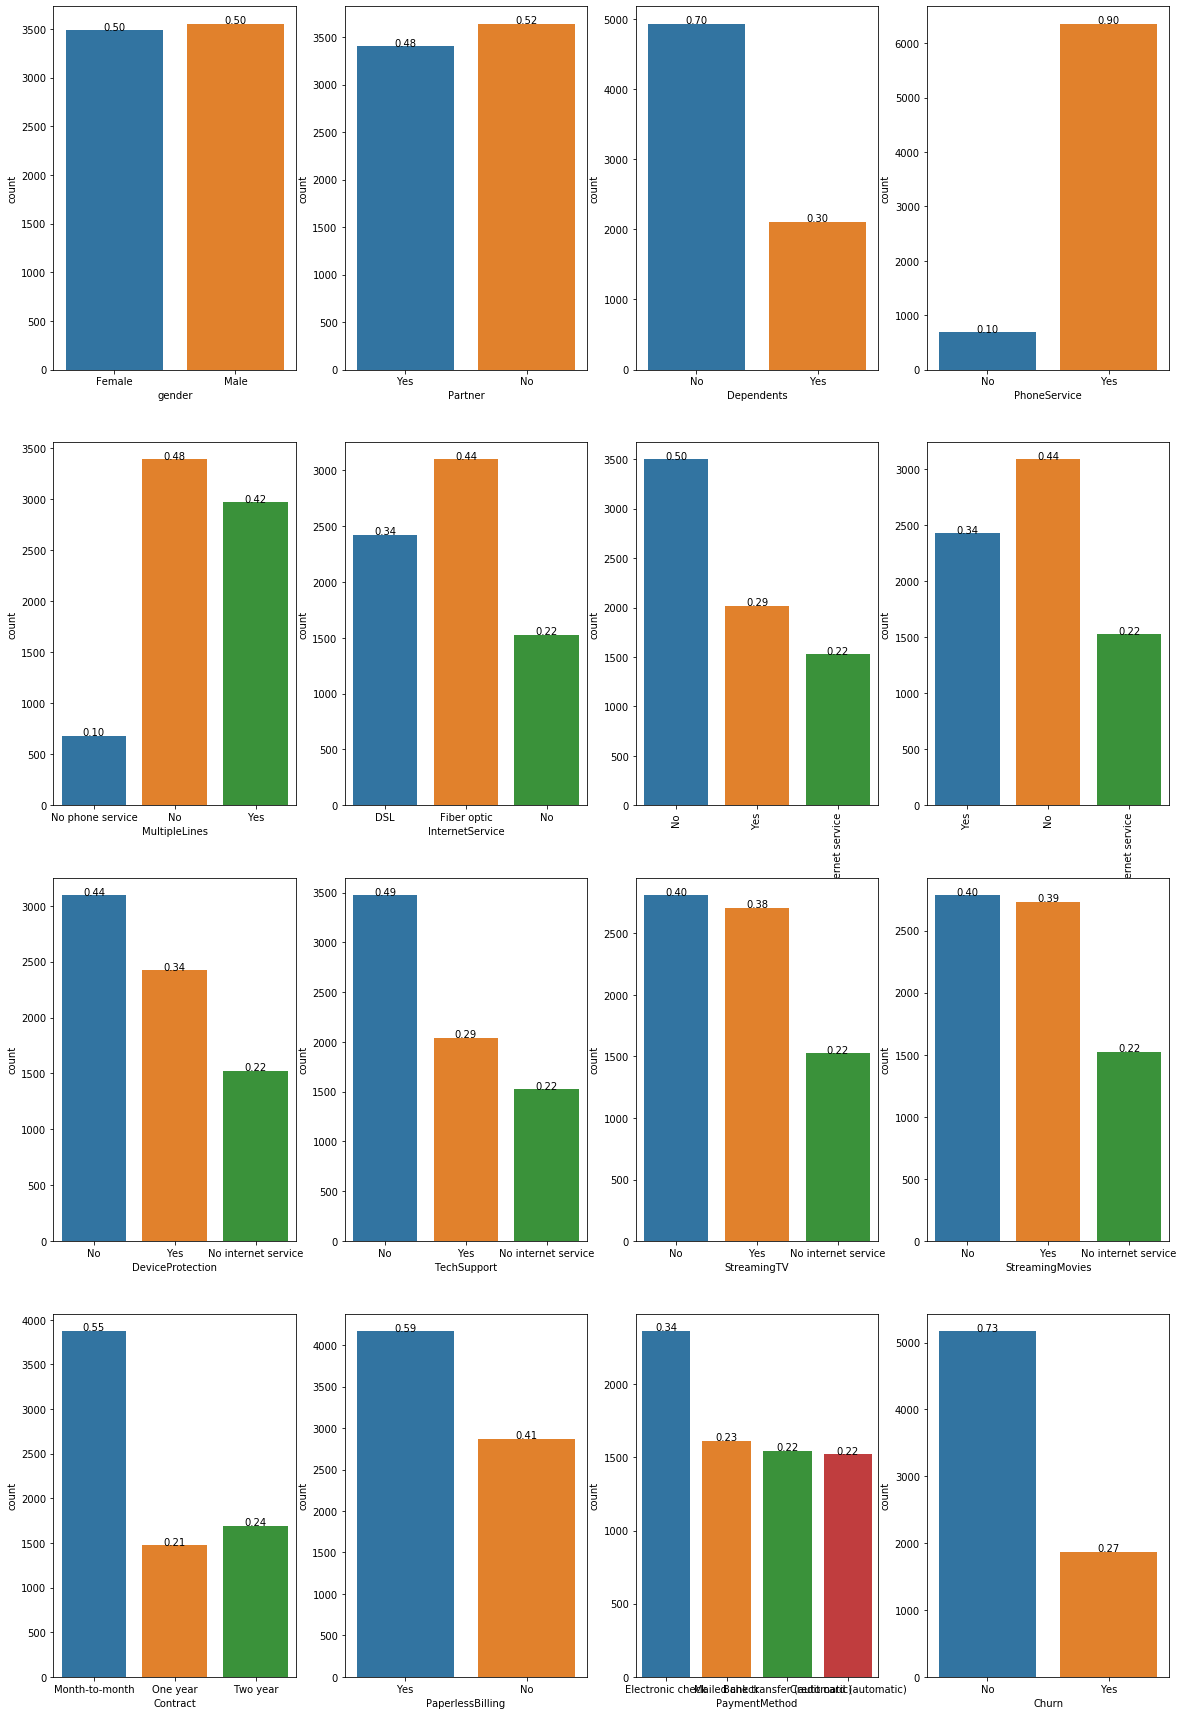

In [35]:
total_records= len(df)
plt.figure(figsize=(20,8))
j=0
for i in categoric:
    j +=1
    plt.subplot(4,4,j)
    ax1 = sns.countplot(data=df,x= i)
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

In [122]:
df = pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [123]:
# Convert 'yes/no' values to '1/0' 
# & also 'no internet/phone service' values to '0' (since 'no internet/phone service' is the same as 'no')
yn_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for variable,i in enumerate(yn_columns):
    #print(yn[yn_columns[variable]].values)
    df[yn_columns[variable]] = np.where(df[yn_columns[variable]].values == 'Yes', 1, 0)

In [128]:
# Convert male/female to 1/0 and gender column name
df = df.rename(columns = {'gender':'is_male'})
df['is_male'].replace(('Female', 'Male'), (0, 1), inplace=True)

In [129]:
df.head()

,customerID,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [130]:
# Dummy variables for vategorical values in gender, Contract, and PaymentMethod
dummy = pd.get_dummies(df['InternetService'])
df = df.merge(dummy, left_index=True, right_index=True)

df = df.drop(['InternetService'], axis=1)

df = df.rename(columns = {'No':'NoInt_service'})

dummy = pd.get_dummies(df['Contract'])
df = df.merge(dummy, left_index=True, right_index=True)

df = df.drop(['Contract'], axis=1)

dummy = pd.get_dummies(df['PaymentMethod'])
df = df.merge(dummy, left_index=True, right_index=True)

df = df.drop(['PaymentMethod'], axis=1)

In [150]:
df.head()

,customerID,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,NoInt_service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [153]:
# Checking data types.
df.dtypes

customerID                    object
is_male                        int64
SeniorCitizen                  int64
Partner                        int32
Dependents                     int32
tenure                         int64
PhoneService                   int32
MultipleLines                  int32
OnlineSecurity                 int32
OnlineBackup                   int32
DeviceProtection               int32
TechSupport                    int32
StreamingTV                    int32
StreamingMovies                int32
PaperlessBilling               int32
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int32
DSL                            uint8
Fiber optic                    uint8
NoInt_service                  uint8
Month-to-month                 uint8
One year                       uint8
Two year                       uint8
Bank transfer (automatic)      uint8
Credit card (automatic)        uint8
Electronic check               uint8
M

In [157]:
# Change dtypes from 'uint8' to 'int32'.
cols = ['DSL', 'Fiber optic', 'NoInt_service', 'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)',
        'Credit card (automatic)', 'Electronic check', 'Mailed check']
for col in cols:
    df[col] = df[col].astype('int32')

df.dtypes

customerID                    object
is_male                        int64
SeniorCitizen                  int64
Partner                        int32
Dependents                     int32
tenure                         int64
PhoneService                   int32
MultipleLines                  int32
OnlineSecurity                 int32
OnlineBackup                   int32
DeviceProtection               int32
TechSupport                    int32
StreamingTV                    int32
StreamingMovies                int32
PaperlessBilling               int32
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int32
DSL                            int32
Fiber optic                    int32
NoInt_service                  int32
Month-to-month                 int32
One year                       int32
Two year                       int32
Bank transfer (automatic)      int32
Credit card (automatic)        int32
Electronic check               int32
M

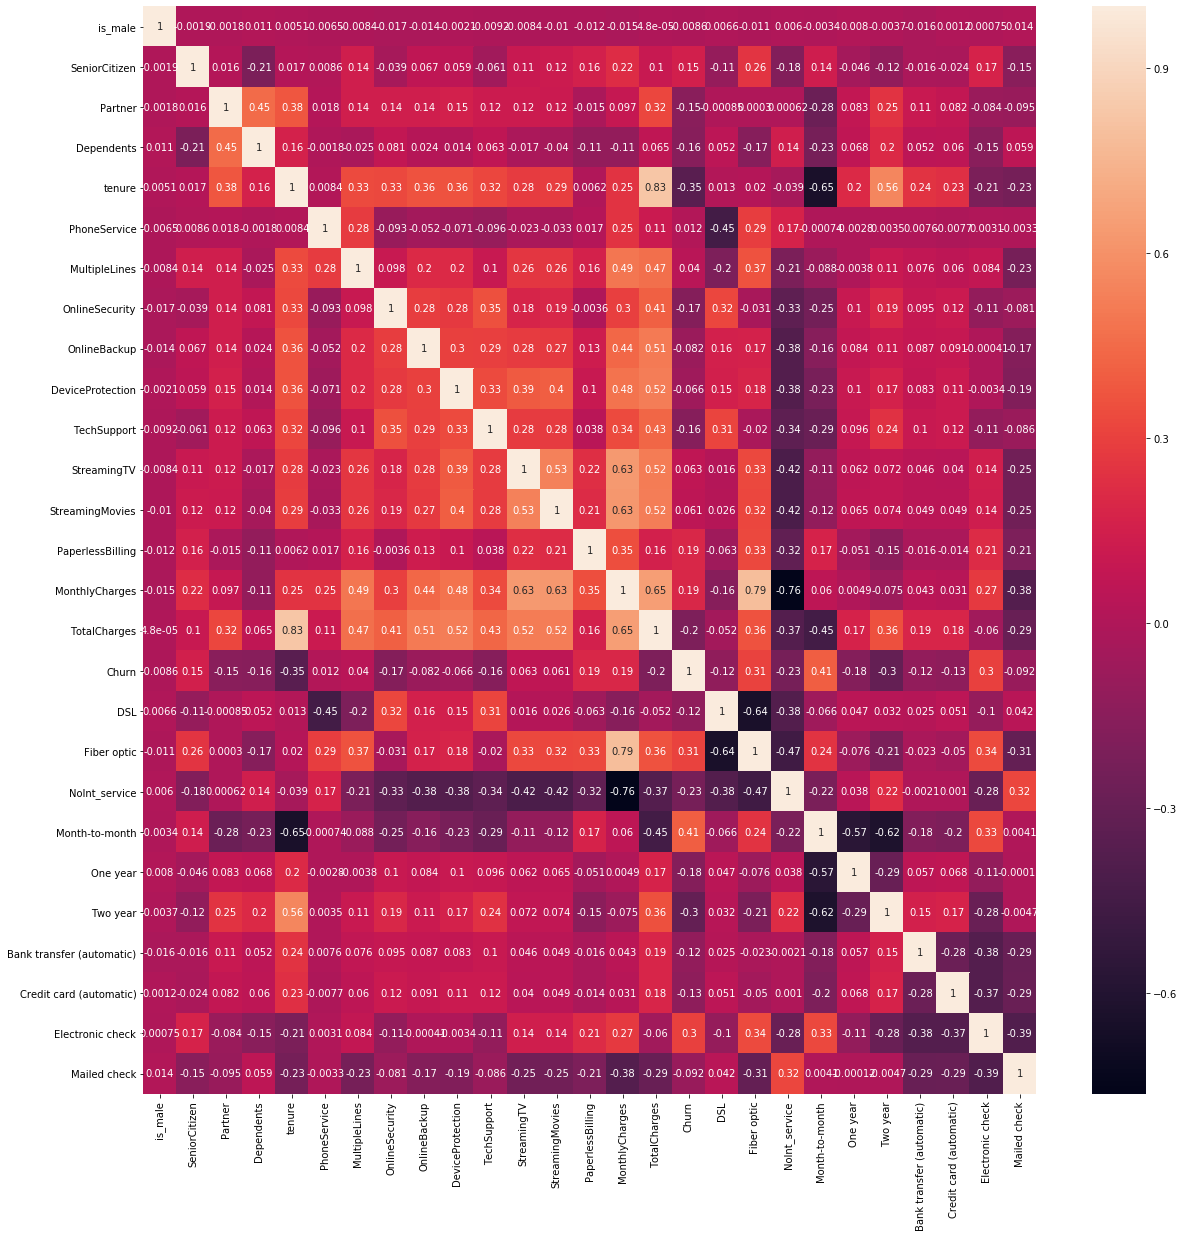

In [158]:
# Run heatmap to check for variable correlations.
df = df.drop(['customerID'], axis=1)

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10})

### Checking for unbalaced data

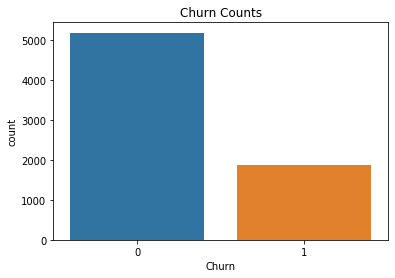

0    5174
1    1869
Name: Churn, dtype: int64

In [159]:
# View value counts.
sns.countplot('Churn', data=df)
plt.title('Churn Counts')
plt.show()
pd.value_counts(df['Churn'])

### Separating values in the target variable

In [160]:
# Create dataframe of only customers who churned.
churn_yes = df[df['Churn'] == 1]

# Create dataframe of only customers who did not churn.
churn_no = df[df['Churn'] == 0]

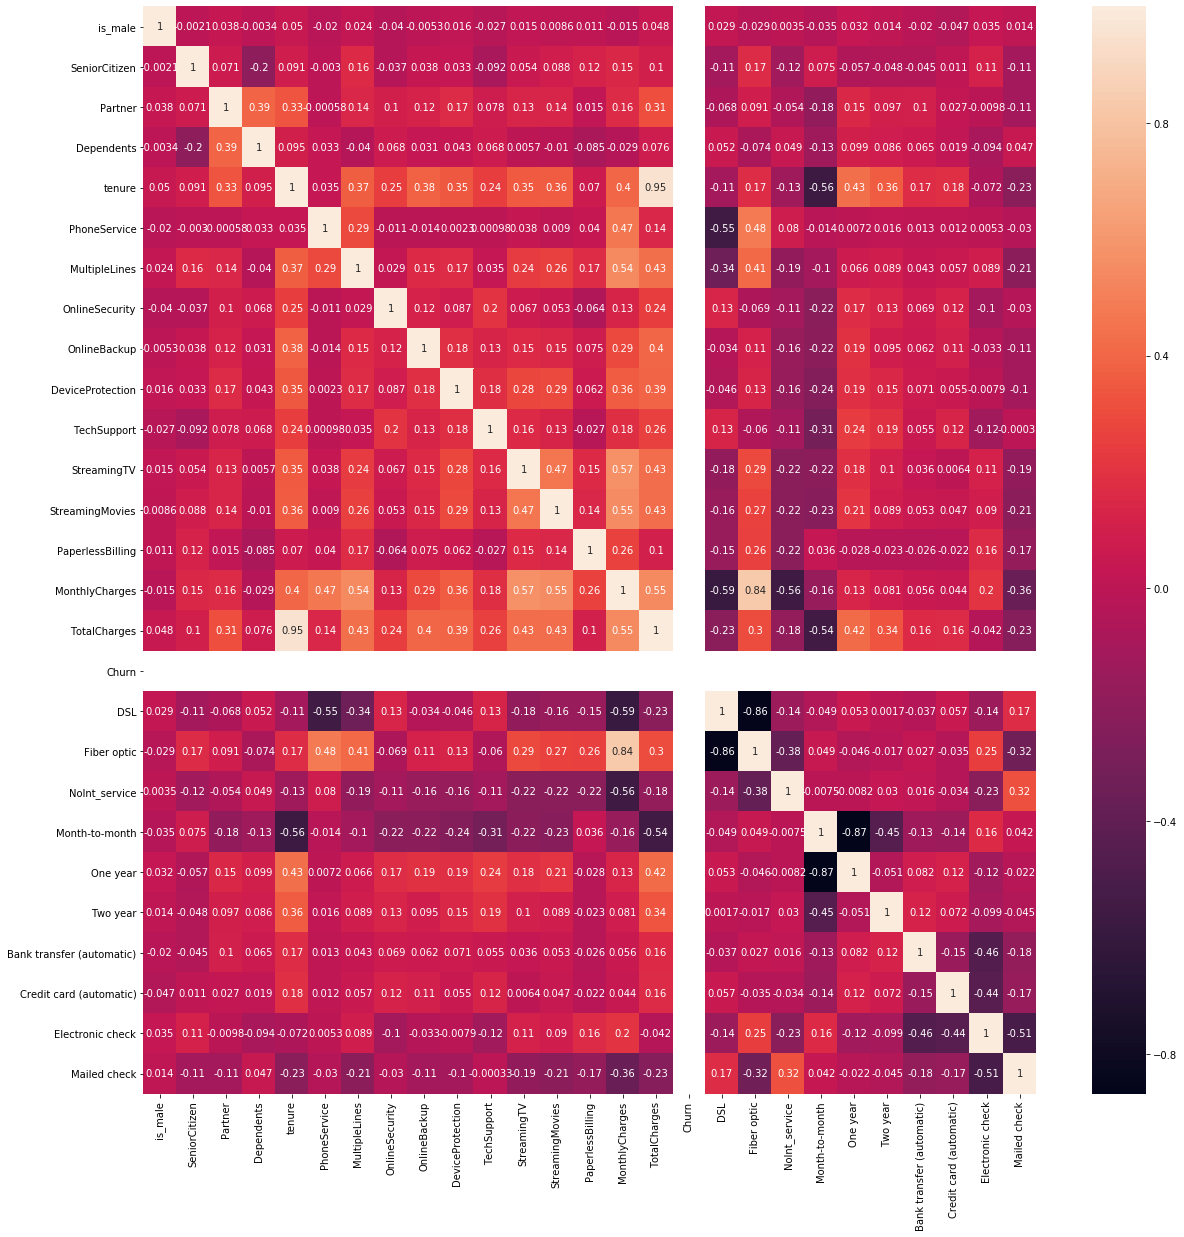

In [161]:
# Run heatmap to check for variable correlations for churn_yes.
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(churn_yes.corr(), annot=True, annot_kws={"size": 10})

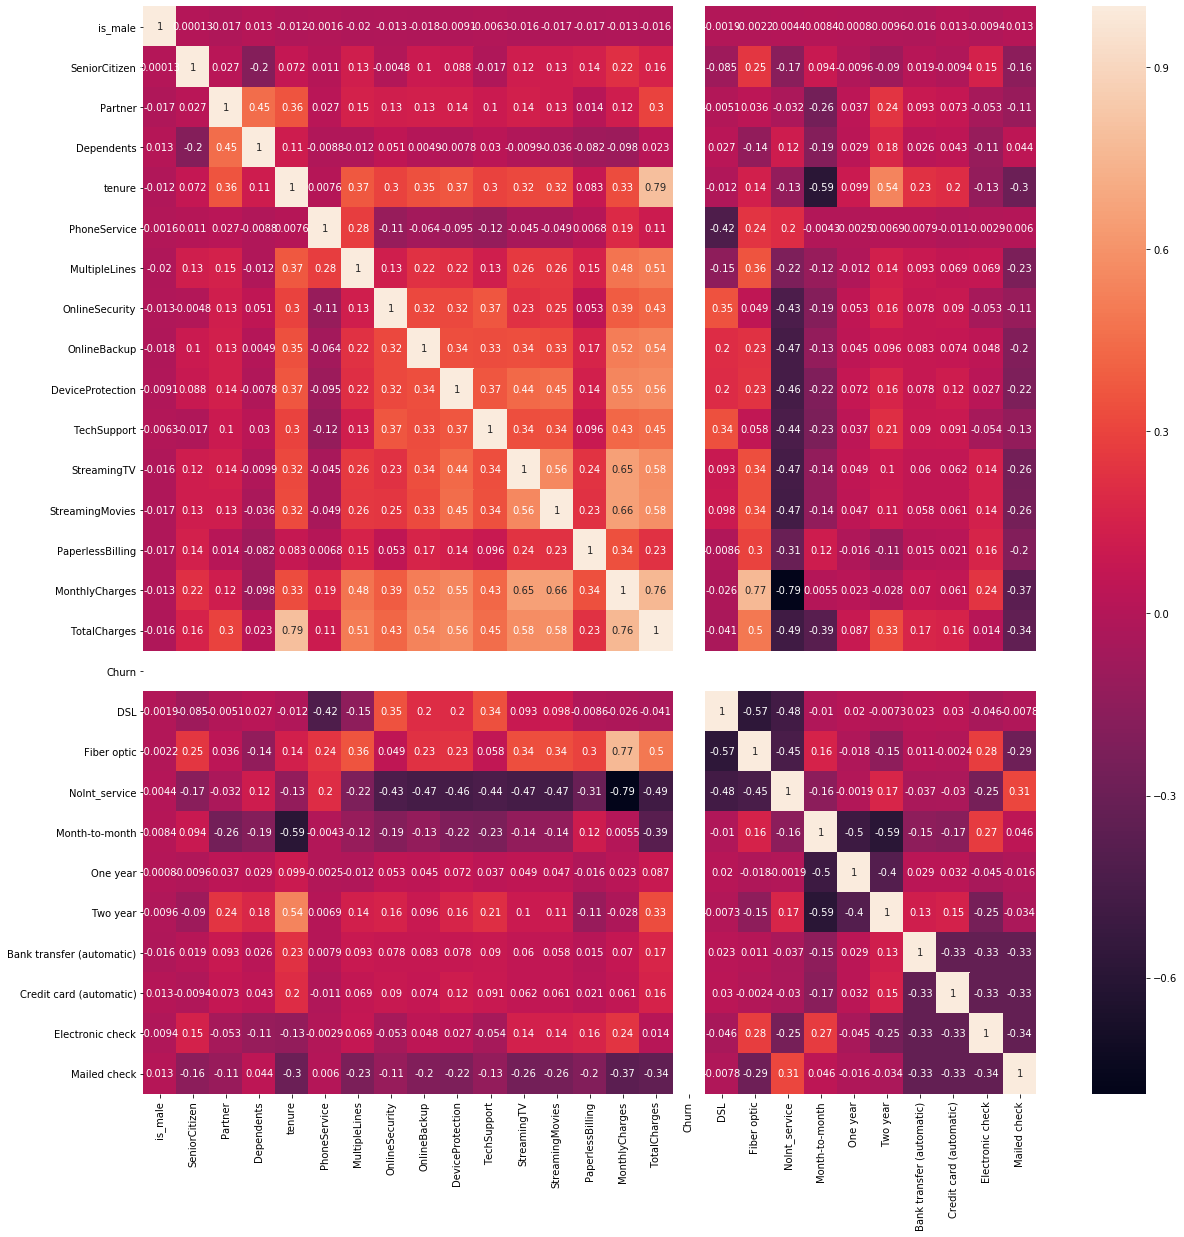

In [162]:
# Run heatmap to check for variable correlations.
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(churn_no.corr(), annot=True, annot_kws={"size": 10})

### Balancing the Data

1    3500
0    3500
Name: Churn, dtype: int64

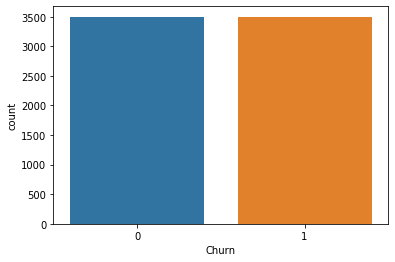

In [164]:
# Resampling the data.

# Upsample minority class.
churn_yes = resample(churn_yes,
                     replace=True,
                     n_samples=3500,
                     random_state=15)

# Downsample majority class.
churn_no = resample(churn_no,
                    replace=True,
                    n_samples=3500,
                    random_state=15)

# Combine upsampled minority class and downsampled majority class.
churn_sampled = pd.concat([churn_yes, churn_no])

# Display new class counts.
sns.countplot('Churn', data=churn_sampled)
churn_sampled.Churn.value_counts()

### Setting up input variables, target variable, and grouping training set

In [165]:
X = churn_sampled.drop('Churn', 1)
y = churn_sampled['Churn']

In [194]:
# Hold out 20% of data for test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 1 )

## Naive Bayes

In [195]:
# Run Naive Bayes.
gnb = GaussianNB()
# Fit the model.
gnb.fit(X_train, y_train)
print(gnb)

GaussianNB(priors=None, var_smoothing=1e-09)


In [196]:
y_pred_gnb = gnb.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gnb)
# Cross-validation.
gnb_score = cross_val_score(gnb, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(gnb_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gnb))

Cross-Validation Scores: [0.76571429 0.74571429 0.76428571 0.77285714 0.78571429 0.76857143
 0.75714286 0.76285714 0.75142857 0.75714286]
Averaged Cross-Validation Scores: 76.31%.
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       699
           1       0.73      0.82      0.77       701

    accuracy                           0.76      1400
   macro avg       0.76      0.76      0.76      1400
weighted avg       0.76      0.76      0.76      1400

[[484 215]
 [125 576]]


### K-Nearest Neighbors

In [199]:
# Finding best parameters by GridSearchCV

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9004285714285715
{'n_neighbors': 29, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='distance')


In [201]:
# Build the KNN model.
knn = KNeighborsClassifier(n_neighbors=29, weights= 'distance')
# Fit the model.
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
# Accuracy score.
accuracy_score(y_test, y_pred_knn)
# Cross-validation.
knn_score = cross_val_score(knn, X, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(knn_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_knn))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='distance')
Cross-Validation Scores: [0.91       0.90857143 0.88428571 0.88857143 0.90714286 0.89857143
 0.91142857 0.89857143 0.88857143 0.90857143]
Averaged Cross-Validation Scores: 90.04%.
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       699
           1       0.87      0.94      0.91       701

    accuracy                           0.90      1400
   macro avg       0.90      0.90      0.90      1400
weighted avg       0.90      0.90      0.90      1400

[[602  97]
 [ 41 660]]


# Decision Tree
### Feature selection using SelectKBest:

In [202]:
# Select top 10 features
selection = SelectKBest(score_func=f_regression, k=10) 
X_kbest = selection.fit(X, y).transform(X)

In [203]:
# Hold out 20% of data for test set
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split( X_kbest, y, test_size = 0.20, random_state = 1 )

In [206]:
# Finding best parameters by GridSearchCV
params = {'criterion':['gini','entropy'], 'max_features': list(range(2, 10)),
          'max_depth':[4,5,6,7,8,9,10,15,20],
          'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'random_state': [1, 5, 10, 15, 20]}
decision_tree = tree.DecisionTreeClassifier()
grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=3)

grid_search_cv.fit(X_kbest, y)

Fitting 3 folds for each of 42336 candidates, totalling 127008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 127008 out of 127008 | elapsed: 25.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 15, 20],
       

In [208]:
print (grid_search_cv.best_score_)
print (grid_search_cv.best_params_)
print (grid_search_cv.best_estimator_)

0.7965714285714286
{'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'max_leaf_nodes': 81, 'min_samples_split': 4}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=7, max_leaf_nodes=81,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [211]:
dtc = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=7,
    max_leaf_nodes=81,
    min_samples_split=4
    max_depth=20,
)
# Fit the model.
dtc.fit(X_train_kbest, y_train_kbest)
print(dtc)
y_pred_dtc = dtc.predict(X_test_kbest)
# Accuracy score.
accuracy_score(y_test, y_pred_dtc)
# Cross-validation.
dtc_score = cross_val_score(dtc, X_kbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(dtc_score.mean()))
# Classification report.
print(classification_report(y_test_kbest, y_pred_dtc))
# Confusion matrix.
print(confusion_matrix(y_test_kbest, y_pred_dtc))

SyntaxError: invalid syntax (<ipython-input-211-f37fe29f96fb>, line 6)